In [1]:
import sys
import os
sys.version

'3.6.3 (default, Oct  3 2017, 21:45:48) \n[GCC 7.2.0]'

In [2]:
os.listdir(".")

['.ipynb_checkpoints',
 'api_submit.py',
 'raw_data',
 'input',
 'test_submission.csv',
 'beijing.ipynb',
 'london.ipynb',
 'sample_submission.csv',
 'data_processing',
 '.idea']

In [3]:
os.listdir("./raw_data")

['beijing_stations.csv',
 'beijing_201802_201803_aq.csv',
 'bj',
 'London_grid_weather_station.csv',
 'Beijing_grid_weather_station.csv',
 'London_AirQuality_Stations.csv',
 'beijing_17_18_aq.csv',
 'London_historical_aqi_other_stations_20180331.csv',
 'beijing_17_18_meo.csv',
 'Beijing_historical_meo_grid.csv',
 'ld',
 'Beijing_AirQuality_Stations_en.xlsx',
 'London_historical_meo_grid.csv',
 'London_historical_aqi_forecast_stations_20180331.csv']

In [104]:
import numpy as np
import pandas as pd
pd.set_option("display.max_rows", 20)

# Data Preparation

## Air quality data

In [105]:
aq_stations = pd.read_csv('raw_data/London_AirQuality_Stations.csv', index_col=0)
aq_stations

,api_data,need_prediction,historical_data,Latitude,Longitude,SiteType,SiteName
BX9,True,NaN,True,51.465983,0.184877,Suburban,Bexley - Slade Green FDMS
BX1,True,NaN,True,51.465983,0.184877,Suburban,Bexley - Slade Green
BL0,True,True,True,51.522287,-0.125848,Urban Background,Camden - Bloomsbury
CD9,True,True,True,51.527707,-0.129053,Roadside,Camden - Euston Road
CD1,True,True,True,51.544219,-0.175284,Kerbside,Camden - Swiss Cottage
CT2,True,NaN,True,51.514525,-0.104516,Kerbside,City of London - Farringdon Street
CT3,True,NaN,True,51.513847,-0.077766,Urban Background,City of London - Sir John Cass School
CR8,NaN,NaN,True,51.410039,-0.127523,Urban Background,Croydon - Norbury Manor
GN0,True,True,True,51.490532,0.074003,Roadside,Greenwich - A206 Burrage Grove
GR4,True,True,True,51.452580,0.070766,Suburban,Greenwich - Eltham


In [106]:
aq_data = pd.read_csv('./raw_data/London_historical_aqi_forecast_stations_20180331.csv', index_col=0)
aq_data

,MeasurementDateGMT,station_id,PM2.5 (ug/m3),PM10 (ug/m3),NO2 (ug/m3)
0,2017/1/1 0:00,CD1,40.0,44.4,36.6
1,2017/1/1 1:00,CD1,31.6,34.4,46.2
2,2017/1/1 2:00,CD1,24.7,28.1,38.3
3,2017/1/1 3:00,CD1,21.2,24.5,32.8
4,2017/1/1 4:00,CD1,24.9,23.0,28.1
5,2017/1/1 5:00,CD1,24.6,23.9,29.3
6,2017/1/1 6:00,CD1,23.9,22.0,28.8
7,2017/1/1 7:00,CD1,22.0,22.9,34.6
8,2017/1/1 8:00,CD1,19.0,20.1,44.6
9,2017/1/1 9:00,CD1,19.9,24.4,55.3


Missing values in air quality data

In [7]:
aq_data.count()

MeasurementDateGMT    141661
station_id            141661
PM2.5 (ug/m3)         122985
PM10 (ug/m3)          127108
NO2 (ug/m3)           116216
dtype: int64

#### Data retrieve from API

In [56]:
sys.path.append('./data_processing')

In [96]:
import utils
live_aq_data = utils.read_multiple_csv('./raw_data/ld/airquality')
live_aq_data = live_aq_data.reset_index(drop=True)
live_aq_data = live_aq_data.drop(['id', 'CO_Concentration', 'O3_Concentration', 'SO2_Concentration'], axis=1)
live_aq_data.columns = ['station_id', 'utc_time', 'PM2.5', 'PM10', 'NO2']
live_aq_data = live_aq_data.reindex(columns = ['utc_time', 'station_id', 'PM2.5', 'PM10', 'NO2'])
live_aq_data.head()

100%|██████████| 24/24 [00:00<00:00, 410.80it/s]


,utc_time,station_id,PM2.5,PM10,NO2
0,2018-03-31 07:00:00,CD1,9.9,14.3,70.4
1,2018-03-31 07:00:00,BL0,8.5,8.8,44.8
2,2018-03-31 07:00:00,GR4,4.8,8.9,16.5
3,2018-03-31 07:00:00,MY7,9.3,10.4,NaN
4,2018-03-31 07:00:00,HV1,8.6,10.5,35.7


In [97]:
live_aq_data.tail()

,utc_time,station_id,PM2.5,PM10,NO2
10404,2018-04-23 05:00:00,BX1,NaN,8.7,12.7
10405,2018-04-23 05:00:00,TH4,8.2,19.4,55.1
10406,2018-04-23 05:00:00,ST5,5.0,18.0,15.6
10407,2018-04-23 05:00:00,RB7,8.0,7.2,19.2
10408,2018-04-23 05:00:00,TD5,5.4,NaN,NaN


In [98]:
live_aq_data.count()

utc_time      10409
station_id    10409
PM2.5          8484
PM10           7341
NO2            6977
dtype: int64

#### Merge Air Quality Data

In [25]:
import utils
aq_data.columns = ['utc_time', 'station_id', 'PM2.5', 'PM10', 'NO2']
live_aq_data = utils.read_multiple_csv('./raw_data/ld/airquality')
live_aq_data = live_aq_data.drop(['id', 'CO_Concentration', 'O3_Concentration', 'SO2_Concentration'], axis=1)
live_aq_data.columns = ['station_id', 'utc_time', 'PM2.5', 'PM10', 'NO2']
live_aq_data = live_aq_data.reindex(columns = ['utc_time', 'station_id', 'PM2.5', 'PM10', 'NO2'])

,utc_time,station_id,PM2.5,PM10,NO2
0,2017/1/1 0:00,CD1,40.0,44.4,36.6
1,2017/1/1 1:00,CD1,31.6,34.4,46.2
2,2017/1/1 2:00,CD1,24.7,28.1,38.3
3,2017/1/1 3:00,CD1,21.2,24.5,32.8
4,2017/1/1 4:00,CD1,24.9,23.0,28.1


In [77]:
aq_data = aq_data.append(live_aq_data, ignore_index=True)

In [89]:
aq_data['utc_time'] = pd.to_datetime(aq_data['utc_time'])
aq_data = aq_data.sort_values(['station_id', 'utc_time'])
aq_data = aq_data.reset_index(drop=True)

In [101]:
merged_aq_data = pd.read_csv('./input/ld_aq_data.csv', index_col=0)

In [107]:
merged_aq_data

,utc_time,station_id,PM2.5,PM10,NO2
0,2017-01-01 00:00:00,BL0,30.8,31.6,10.8
1,2017-01-01 01:00:00,BL0,22.9,34.6,17.3
2,2017-01-01 02:00:00,BL0,18.4,25.2,14.2
3,2017-01-01 03:00:00,BL0,19.5,24.0,14.8
4,2017-01-01 04:00:00,BL0,22.1,26.7,16.7
5,2017-01-01 05:00:00,BL0,22.8,27.3,16.2
6,2017-01-01 06:00:00,BL0,19.6,25.3,19.5
7,2017-01-01 07:00:00,BL0,15.6,24.0,21.0
8,2017-01-01 08:00:00,BL0,18.1,23.4,28.0
9,2017-01-01 09:00:00,BL0,14.5,22.5,26.4


## Meteorology Data

In [108]:
meo_data = pd.read_csv('raw_data/London_historical_meo_grid.csv')
meo_data

,stationName,longitude,latitude,utc_time,temperature,pressure,humidity,wind_direction,wind_speed/kph
0,london_grid_000,-2.0,50.5,2017-01-01 00:00:00,9.36,1024.81,77.90,250.88,23.74
1,london_grid_001,-2.0,50.6,2017-01-01 00:00:00,9.09,1024.25,78.96,249.86,21.81
2,london_grid_002,-2.0,50.7,2017-01-01 00:00:00,8.30,1022.55,82.13,245.35,16.08
3,london_grid_003,-2.0,50.8,2017-01-01 00:00:00,7.50,1020.86,85.30,235.98,10.55
4,london_grid_004,-2.0,50.9,2017-01-01 00:00:00,6.92,1015.89,88.51,228.21,10.97
5,london_grid_005,-2.0,51.0,2017-01-01 00:00:00,6.33,1010.92,91.73,221.12,11.57
6,london_grid_006,-2.0,51.1,2017-01-01 00:00:00,6.13,1008.79,92.89,220.29,13.06
7,london_grid_007,-2.0,51.2,2017-01-01 00:00:00,6.12,1008.09,93.01,221.89,14.96
8,london_grid_008,-2.0,51.3,2017-01-01 00:00:00,6.19,1008.12,92.99,223.30,16.64
9,london_grid_009,-2.0,51.4,2017-01-01 00:00:00,6.43,1009.58,92.64,224.78,17.89


In [47]:
meo_data.describe()

,longitude,latitude,temperature,pressure,humidity,wind_direction,wind_speed/kph
count,9.303966e+06,9.303966e+06,9.303966e+06,9.303966e+06,9.303966e+06,9.303966e+06,9.303966e+06
mean,-1.014803e-17,5.150000e+01,1.002334e+01,1.009024e+03,8.160677e+01,2.121582e+02,2.024103e+01
std,1.183216e+00,6.055301e-01,5.529378e+00,1.200430e+01,1.036175e+01,8.819387e+01,1.089396e+01
min,-2.000000e+00,5.050000e+01,-7.650000e+00,9.566500e+02,2.480000e+01,0.000000e+00,1.000000e-02
25%,-1.000000e+00,5.100000e+01,5.970000e+00,1.001790e+03,7.468000e+01,1.601900e+02,1.212000e+01
50%,0.000000e+00,5.150000e+01,9.760000e+00,1.010180e+03,8.296000e+01,2.326200e+02,1.832000e+01
75%,1.000000e+00,5.200000e+01,1.440000e+01,1.017480e+03,8.990000e+01,2.741000e+02,2.610000e+01
max,2.000000e+00,5.250000e+01,3.133000e+01,1.039900e+03,1.000100e+02,3.600000e+02,8.909000e+01


In [48]:
meo_data.count()

stationName       9303966
longitude         9303966
latitude          9303966
utc_time          9303966
temperature       9303966
pressure          9303966
humidity          9303966
wind_direction    9303966
wind_speed/kph    9303966
dtype: int64

#### Data retrieve from API

In [110]:
live_meo_data = pd.read_csv('./raw_data/ld/ld_grid/ld_ld_grid_2018-03-31.csv')
live_meo_data

,id,station_id,time,weather,temperature,pressure,humidity,wind_direction,wind_speed
0,2000096,london_grid_000,2018-03-31 07:00:00,CLOUDY,6.14,995.3492,85.0,304.13,21.98
1,2000097,london_grid_001,2018-03-31 07:00:00,CLOUDY,5.43,994.1751,88.0,303.32,18.90
2,2000098,london_grid_002,2018-03-31 07:00:00,CLOUDY,4.73,993.0009,91.0,302.20,15.82
3,2000099,london_grid_003,2018-03-31 07:00:00,RAIN,4.25,990.1415,93.0,303.02,14.06
4,2000100,london_grid_004,2018-03-31 07:00:00,RAIN,3.99,985.5967,95.0,306.29,13.63
5,2000101,london_grid_005,2018-03-31 07:00:00,RAIN,3.72,981.0520,97.0,309.77,13.25
6,2000102,london_grid_006,2018-03-31 07:00:00,RAIN,3.75,980.3165,96.0,317.36,14.03
7,2000103,london_grid_007,2018-03-31 07:00:00,RAIN,3.78,979.5811,96.0,324.05,15.03
8,2000104,london_grid_008,2018-03-31 07:00:00,RAIN,3.86,979.8812,96.0,329.24,15.90
9,2000105,london_grid_009,2018-03-31 07:00:00,RAIN,3.98,981.2169,96.0,333.36,16.58


In [15]:
live_meo_data.count()

id                14637
station_id        14637
time              14637
weather           14637
temperature       14637
pressure          14637
humidity          14637
wind_direction    14637
wind_speed        14637
dtype: int64

**There aren't any missing values in meteorology data** (What a good news)

#### Merged Weather Data

In [141]:
merged_meo_data = pd.read_csv('./input/ld_meo_data.csv', index_col=0)
merged_meo_data

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,station_id,longitude,latitude,utc_time,temperature,pressure,humidity,wind_direction,wind_speed,weather
0,0,london_grid_000,-2.0,50.5,2017-01-01 00:00:00,9.36,1024.8100,77.90,250.88,23.74,NaN
1,1,london_grid_001,-2.0,50.6,2017-01-01 00:00:00,9.09,1024.2500,78.96,249.86,21.81,NaN
2,2,london_grid_002,-2.0,50.7,2017-01-01 00:00:00,8.30,1022.5500,82.13,245.35,16.08,NaN
3,3,london_grid_003,-2.0,50.8,2017-01-01 00:00:00,7.50,1020.8600,85.30,235.98,10.55,NaN
4,4,london_grid_004,-2.0,50.9,2017-01-01 00:00:00,6.92,1015.8900,88.51,228.21,10.97,NaN
5,5,london_grid_005,-2.0,51.0,2017-01-01 00:00:00,6.33,1010.9200,91.73,221.12,11.57,NaN
6,6,london_grid_006,-2.0,51.1,2017-01-01 00:00:00,6.13,1008.7900,92.89,220.29,13.06,NaN
7,7,london_grid_007,-2.0,51.2,2017-01-01 00:00:00,6.12,1008.0900,93.01,221.89,14.96,NaN
8,8,london_grid_008,-2.0,51.3,2017-01-01 00:00:00,6.19,1008.1200,92.99,223.30,16.64,NaN
9,9,london_grid_009,-2.0,51.4,2017-01-01 00:00:00,6.43,1009.5800,92.64,224.78,17.89,NaN


# EDA

In [16]:
import seaborn as sns
%matplotlib inline

In [17]:
meo_only = meo_data[['stationName', 'temperature', 'pressure', 'humidity', 'wind_direction', 'wind_speed/kph']]
meo_only.head()

,stationName,temperature,pressure,humidity,wind_direction,wind_speed/kph
0,london_grid_000,9.36,1024.81,77.90,250.88,23.74
1,london_grid_001,9.09,1024.25,78.96,249.86,21.81
2,london_grid_002,8.30,1022.55,82.13,245.35,16.08
3,london_grid_003,7.50,1020.86,85.30,235.98,10.55
4,london_grid_004,6.92,1015.89,88.51,228.21,10.97


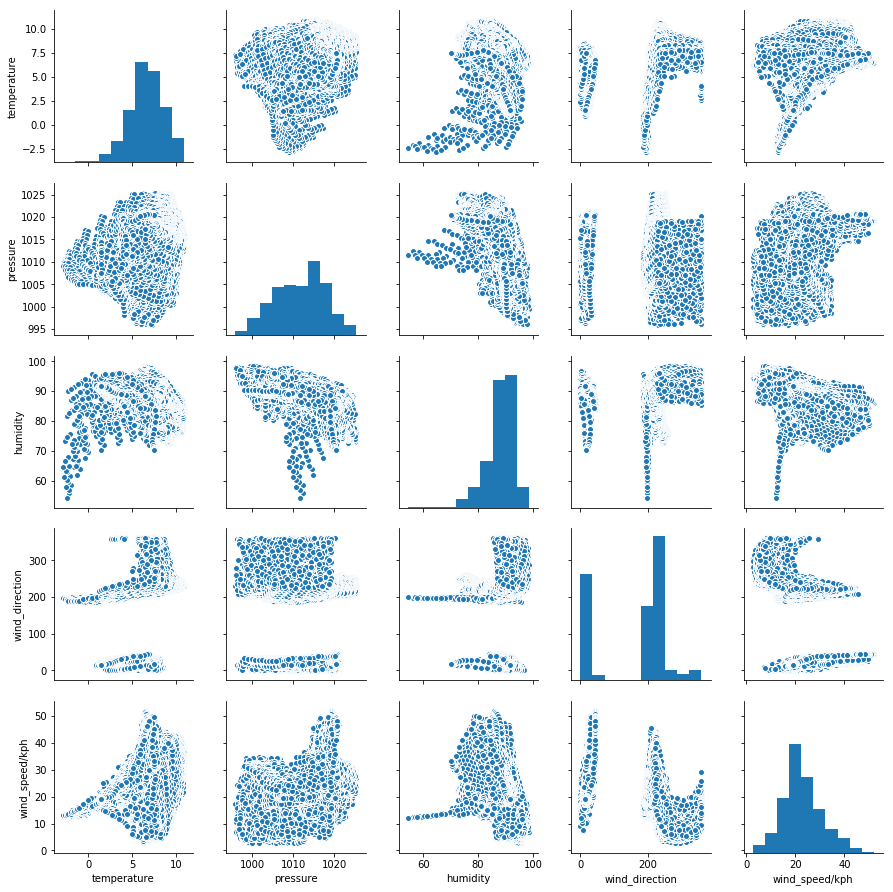

In [18]:
sns.pairplot(meo_only.iloc[0:20000])

/home/inq/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


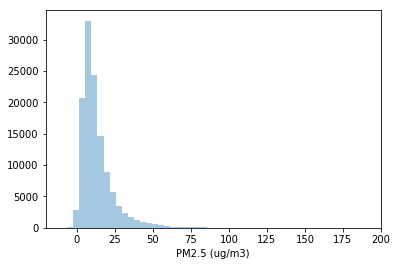

In [19]:
sns.distplot(aq_data['PM2.5 (ug/m3)'].dropna(), kde=False)

/home/inq/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


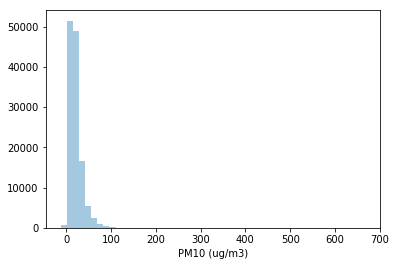

In [20]:
sns.distplot(aq_data['PM10 (ug/m3)'].dropna(), kde=False)

Next step:  
1) Find connections between meteorology data and air quality data  
2) Merge historical data with API data